In [1]:
import machine_definitions
from IPython.display import Image as Show

In [2]:
m = machine_definitions.M()

In [3]:
m.green_machine()

In [4]:
m.process_automata()

Validity: True
Rejected:  PFr PFr+ PFr# PxFr PxFr+ PxFr# PFFr PFFr+ PFFr# PFxFr PFxFr+ PFxFr# PrFr PrFr+ PrFr# PrxFr PrxFr+ PrxFr# PFrFr PFrFr+ PFrFr# PFrxFr PFrxFr+ PFrxFr# 


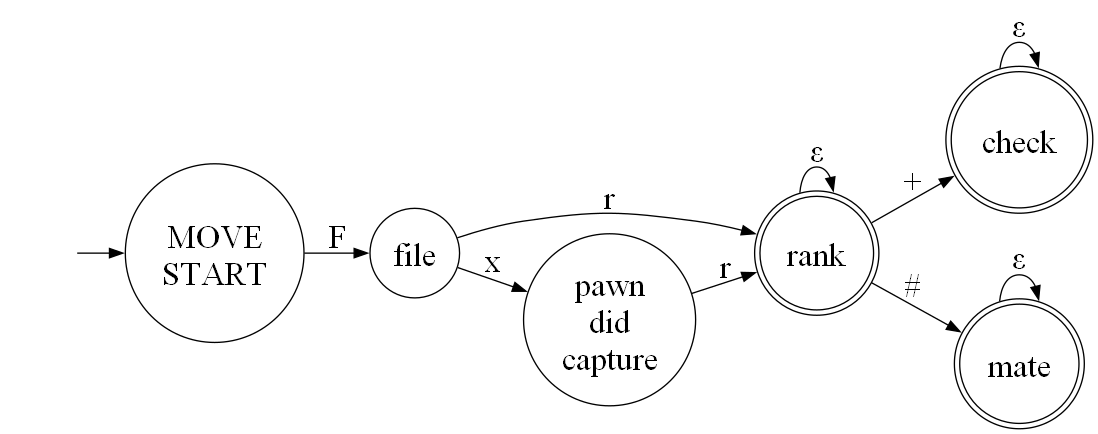

In [5]:
Show(filename='automata.gv.png')

Validity: True
Rejected:  PFFr PFFr+ PFFr# PFxFr PFxFr+ PFxFr# PrFr PrFr+ PrFr# PrxFr PrxFr+ PrxFr# PFrFr PFrFr+ PFrFr# PFrxFr PFrxFr+ PFrxFr# 


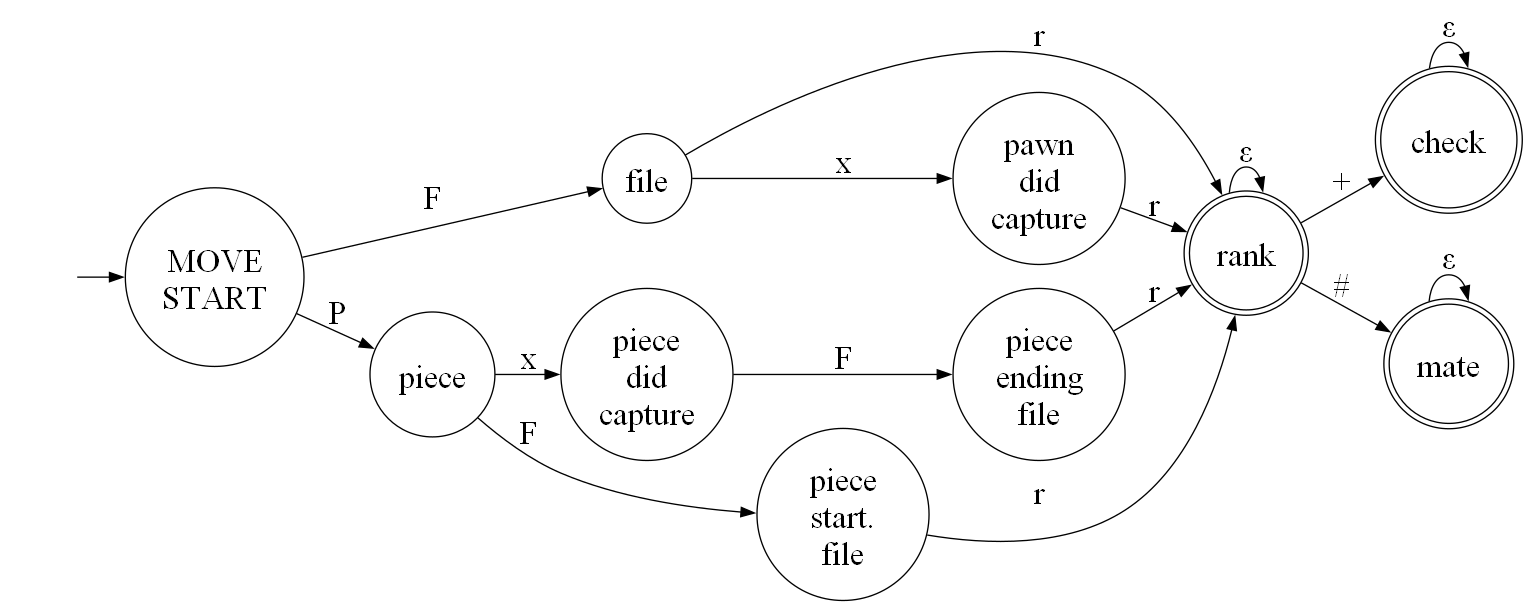

In [6]:
m.light_green_machine()
m.process_automata('lightgreen')
Show(filename='lightgreen.gv.png')

Validity: True
Rejected:  PrFr PrFr+ PrFr# PrxFr PrxFr+ PrxFr# PFrFr PFrFr+ PFrFr# PFrxFr PFrxFr+ PFrxFr# 


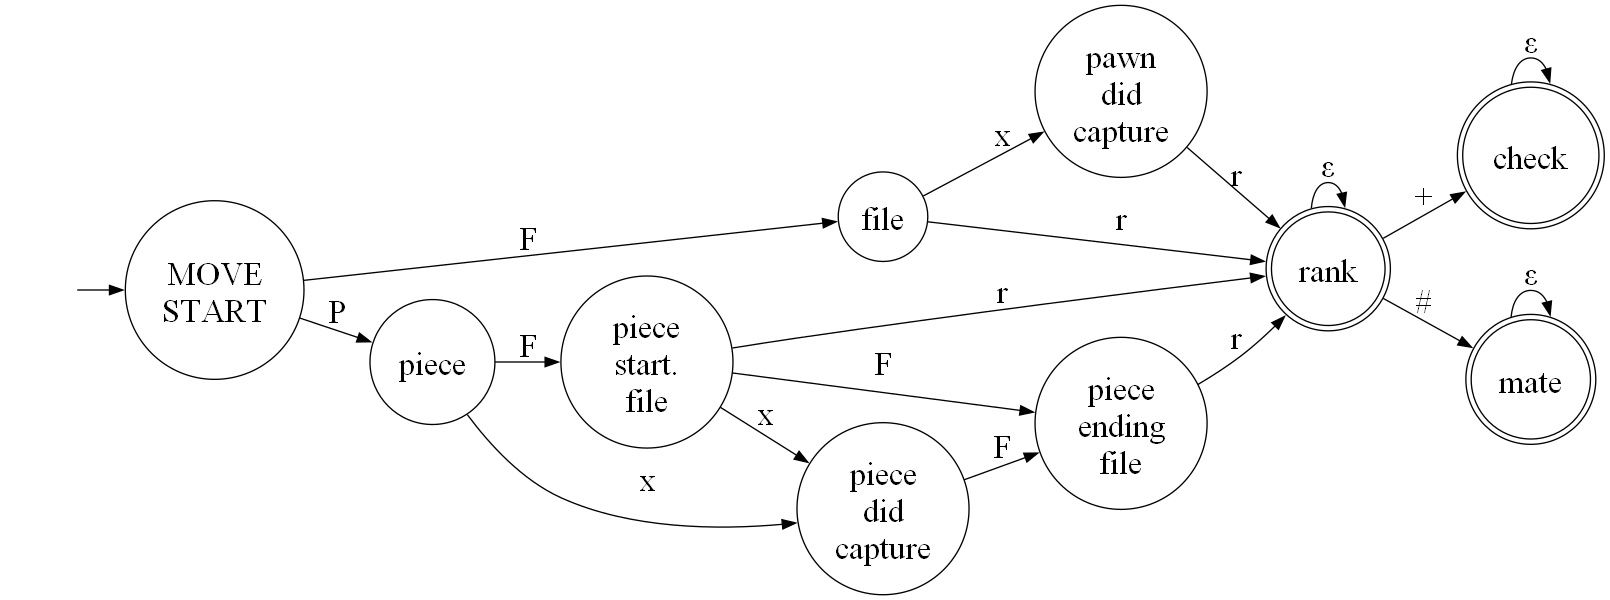

In [7]:
m.yellow_machine()
m.process_automata('yellow')
Show(filename='yellow.gv.png')

Validity: True
Rejected:  PFrFr PFrFr+ PFrFr# PFrxFr PFrxFr+ PFrxFr# 


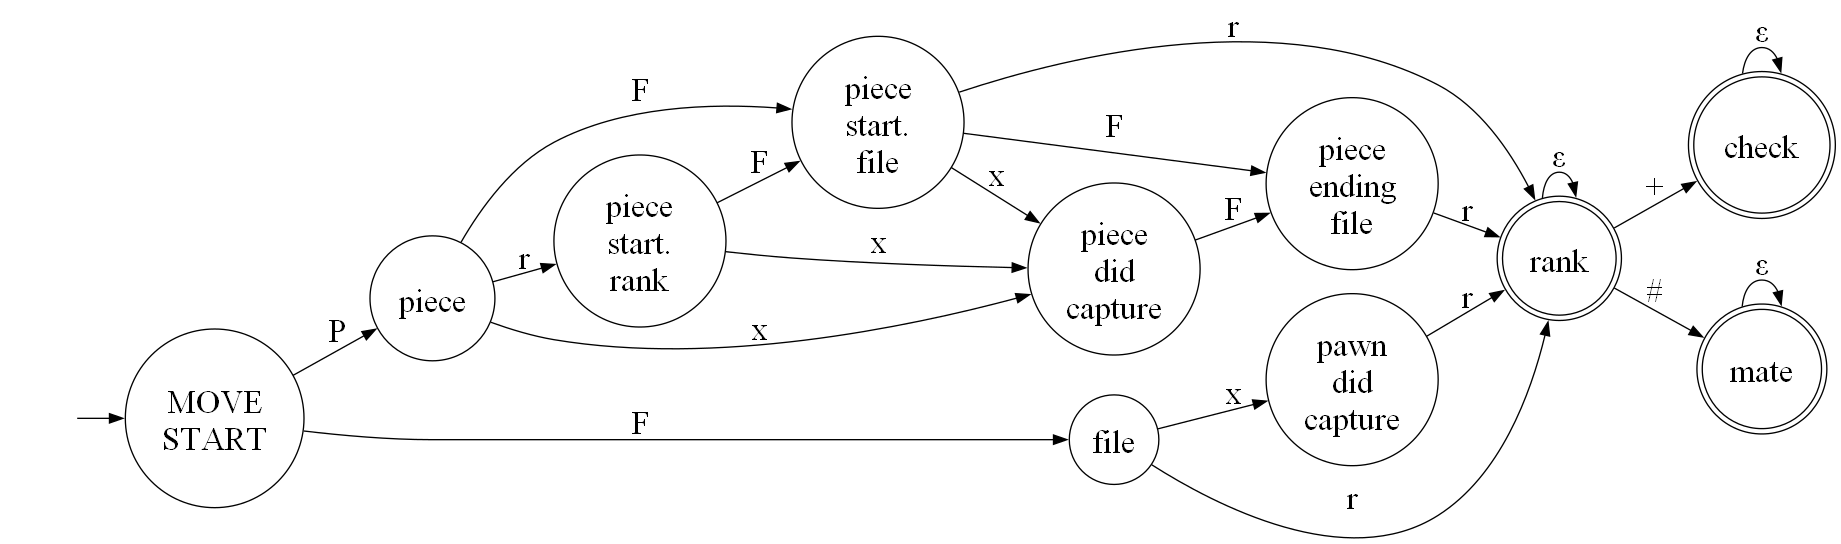

In [8]:
m.red_machine()
m.process_automata('red')
Show(filename='red.gv.png')

Validity: True
Rejected:  


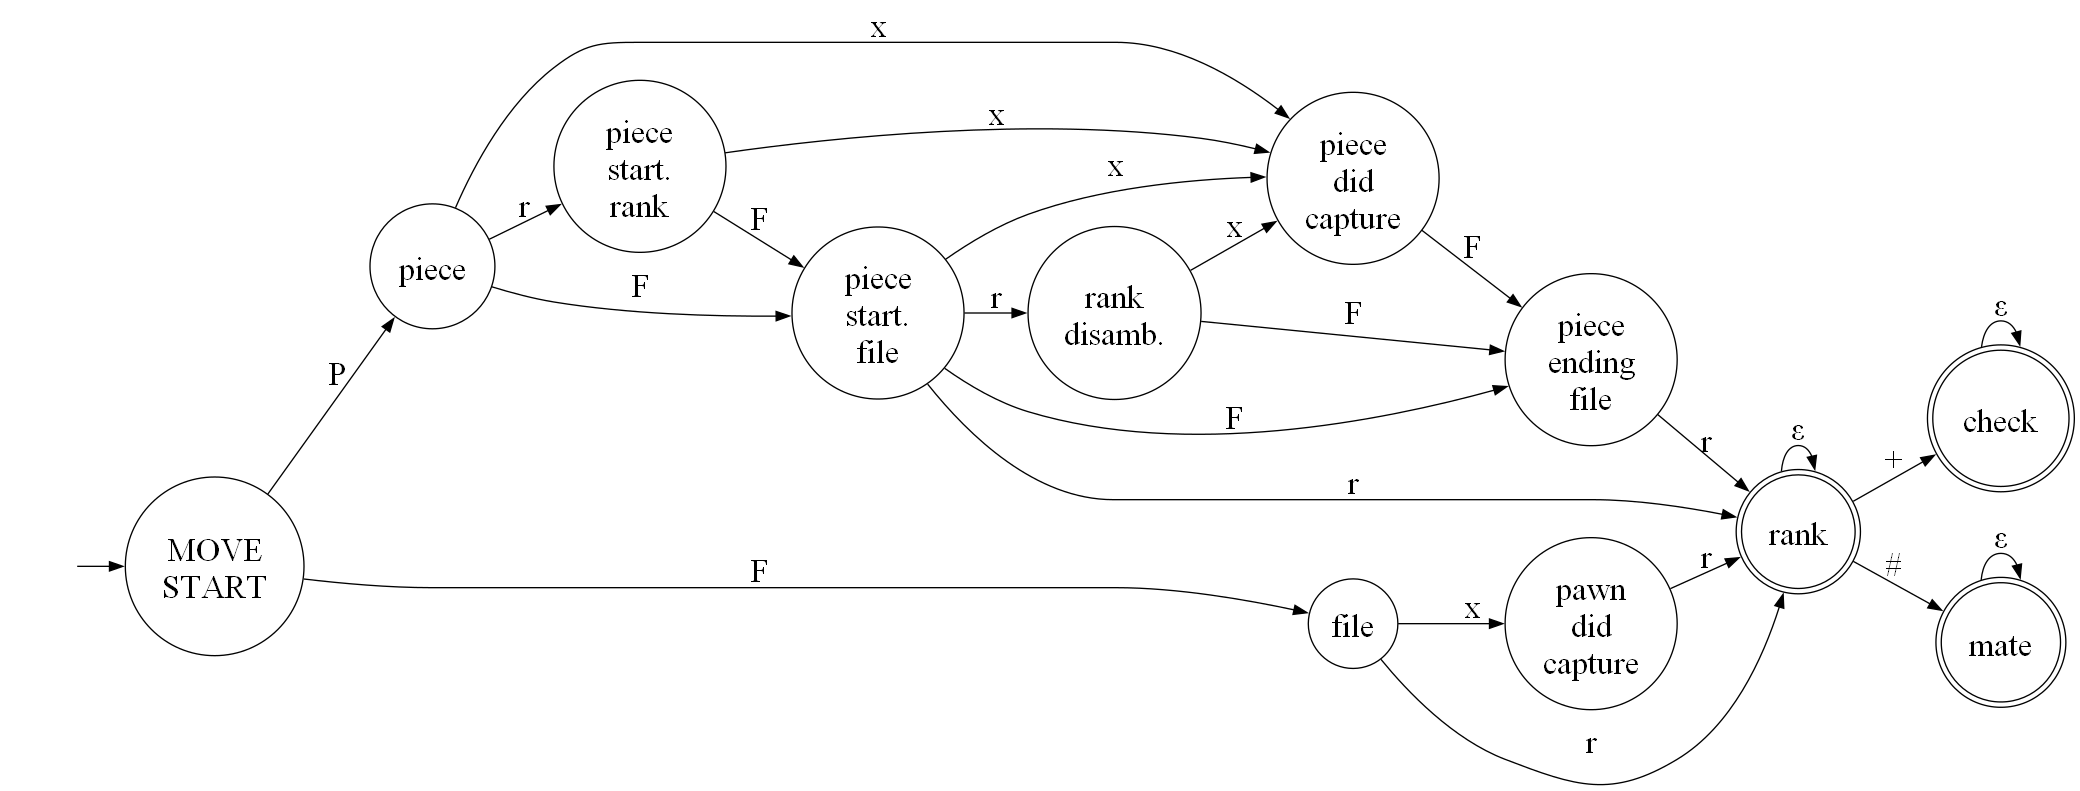

In [9]:
m.dark_red_machine()
m.process_automata('dark_red')
Show(filename='dark_red.gv.png')

In [10]:
m.automata

NFA(q={'piece\nstart.\nrank', 'piece\nending\nfile', 'check', 'file', 'piece', 'pawn\ndid\ncapture', 'rank\ndisamb.', 'MOVE\nSTART', 'piece\ndid\ncapture', 'rank', 'mate', 'piece\nstart.\nfile'}, sigma={'x', '+', 'ε', 'P', 'r', '#', 'F'}, delta={'MOVE\nSTART': {'F': {'file'}, 'P': {'piece'}}, 'file': {'r': {'rank'}, 'x': {'pawn\ndid\ncapture'}}, 'pawn\ndid\ncapture': {'r': {'rank'}}, 'rank': {'+': {'check'}, '#': {'mate'}, 'ε': {'rank'}}, 'check': {'ε': {'check'}}, 'mate': {'ε': {'mate'}}, 'piece': {'F': {'piece\nstart.\nfile'}, 'x': {'piece\ndid\ncapture'}, 'r': {'piece\nstart.\nrank'}}, 'piece\ndid\ncapture': {'F': {'piece\nending\nfile'}}, 'piece\nstart.\nfile': {'r': {'rank', 'rank\ndisamb.'}, 'F': {'piece\nending\nfile'}, 'x': {'piece\ndid\ncapture'}}, 'piece\nending\nfile': {'r': {'rank'}}, 'piece\nstart.\nrank': {'F': {'piece\nstart.\nfile'}, 'x': {'piece\ndid\ncapture'}}, 'rank\ndisamb.': {'F': {'piece\nending\nfile'}, 'x': {'piece\ndid\ncapture'}}}, initial_state='MOVE\nSTART'

In [11]:
m.automata.q

{'MOVE\nSTART',
 'check',
 'file',
 'mate',
 'pawn\ndid\ncapture',
 'piece',
 'piece\ndid\ncapture',
 'piece\nending\nfile',
 'piece\nstart.\nfile',
 'piece\nstart.\nrank',
 'rank',
 'rank\ndisamb.'}

In [12]:
m.automata.delta

{'MOVE\nSTART': {'F': {'file'}, 'P': {'piece'}},
 'file': {'r': {'rank'}, 'x': {'pawn\ndid\ncapture'}},
 'pawn\ndid\ncapture': {'r': {'rank'}},
 'rank': {'+': {'check'}, '#': {'mate'}, 'ε': {'rank'}},
 'check': {'ε': {'check'}},
 'mate': {'ε': {'mate'}},
 'piece': {'F': {'piece\nstart.\nfile'},
  'x': {'piece\ndid\ncapture'},
  'r': {'piece\nstart.\nrank'}},
 'piece\ndid\ncapture': {'F': {'piece\nending\nfile'}},
 'piece\nstart.\nfile': {'r': {'rank', 'rank\ndisamb.'},
  'F': {'piece\nending\nfile'},
  'x': {'piece\ndid\ncapture'}},
 'piece\nending\nfile': {'r': {'rank'}},
 'piece\nstart.\nrank': {'F': {'piece\nstart.\nfile'},
  'x': {'piece\ndid\ncapture'}},
 'rank\ndisamb.': {'F': {'piece\nending\nfile'}, 'x': {'piece\ndid\ncapture'}}}

In [13]:
d = m.automata.delta
d.keys()

dict_keys(['MOVE\nSTART', 'file', 'pawn\ndid\ncapture', 'rank', 'check', 'mate', 'piece', 'piece\ndid\ncapture', 'piece\nstart.\nfile', 'piece\nending\nfile', 'piece\nstart.\nrank', 'rank\ndisamb.'])

In [14]:
cfg = dict()
for qn in m.automata.delta:
    part1 = qn.replace('\n','_')
    part1 += '-->'
    for k,v in d[qn].items():
        # print(k,v)
        for vn in v:
            part2 = k
            part3 = vn.replace('\n','_')
            # print(qn.replace('\n','-'), k,vn.replace('\n','-'))
            part1 += f'{part2}{part3}|'
            # print(part1)
    cfg[qn] = part1
    # print('--------')
for k in cfg.keys():
    if k in m.f:
        cfg[k] += 'ε'
    else:
        cfg[k] = cfg[k][:-1]
    print(cfg[k])
for qn in m.f:
    if qn not in cfg.keys():
        cfg[qn] = f'{qn}-->ε'
for k in cfg.keys():
    print(cfg[k])

MOVE_START-->Ffile|Ppiece
file-->rrank|xpawn_did_capture
pawn_did_capture-->rrank
rank-->+check|#mate|εrank|ε
check-->εcheck|ε
mate-->εmate|ε
piece-->Fpiece_start._file|xpiece_did_capture|rpiece_start._rank
piece_did_capture-->Fpiece_ending_file
piece_start._file-->rrank|rrank_disamb.|Fpiece_ending_file|xpiece_did_capture
piece_ending_file-->rrank
piece_start._rank-->Fpiece_start._file|xpiece_did_capture
rank_disamb.-->Fpiece_ending_file|xpiece_did_capture
MOVE_START-->Ffile|Ppiece
file-->rrank|xpawn_did_capture
pawn_did_capture-->rrank
rank-->+check|#mate|εrank|ε
check-->εcheck|ε
mate-->εmate|ε
piece-->Fpiece_start._file|xpiece_did_capture|rpiece_start._rank
piece_did_capture-->Fpiece_ending_file
piece_start._file-->rrank|rrank_disamb.|Fpiece_ending_file|xpiece_did_capture
piece_ending_file-->rrank
piece_start._rank-->Fpiece_start._file|xpiece_did_capture
rank_disamb.-->Fpiece_ending_file|xpiece_did_capture


In [15]:
for k in cfg.keys():
    print(cfg[k].replace('-->',r' &\to ').replace('|',r' \OR ').replace('ε', '\epsilon').replace('_', '\,') + r' \\')

MOVE\,START &\to Ffile \OR Ppiece \\
file &\to rrank \OR xpawn\,did\,capture \\
pawn\,did\,capture &\to rrank \\
rank &\to +check \OR #mate \OR \epsilonrank \OR \epsilon \\
check &\to \epsiloncheck \OR \epsilon \\
mate &\to \epsilonmate \OR \epsilon \\
piece &\to Fpiece\,start.\,file \OR xpiece\,did\,capture \OR rpiece\,start.\,rank \\
piece\,did\,capture &\to Fpiece\,ending\,file \\
piece\,start.\,file &\to rrank \OR rrank\,disamb. \OR Fpiece\,ending\,file \OR xpiece\,did\,capture \\
piece\,ending\,file &\to rrank \\
piece\,start.\,rank &\to Fpiece\,start.\,file \OR xpiece\,did\,capture \\
rank\,disamb. &\to Fpiece\,ending\,file \OR xpiece\,did\,capture \\
